# Data preparation for machine learning

In [1]:
from IPython.display import Image
%matplotlib inline

## Understanding the scikit-learn estimator API

In [2]:
Image(filename='./images/04_04.png', width=400) 

FileNotFoundError: [Errno 2] No such file or directory: './images/04_04.png'

In [3]:
Image(filename='./images/04_05.png', width=400) 

FileNotFoundError: [Errno 2] No such file or directory: './images/04_05.png'

# 處理類別資料Handling categorical data

In [4]:
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


## 對應有順序性資料 Mapping ordinal features

In [5]:
size_mapping = {"M":1,"L":2,"XL":3}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


## 標籤編碼 Encoding class labels

In [6]:
import numpy as np

class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
# enumerate
class_mapping

{'class1': 0, 'class2': 1}

In [7]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [8]:
df['classlabel']

0    0
1    1
2    0
Name: classlabel, dtype: int64

In [9]:
np.unique(df['classlabel'])

array([0, 1])

In [10]:
list(enumerate(["A","B","C","D"]))

[(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D')]

In [11]:
for X,y in enumerate(["A","B","C","D"]):
    print(X,y)

0 A
1 B
2 C
3 D


In [12]:
dict((X,y) for X,y in enumerate(["A","B","C","D"]))

{0: 'A', 1: 'B', 2: 'C', 3: 'D'}

In [13]:
list((X,y) for X,y in enumerate(["A","B","C","D"]))

[(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D')]

In [14]:
{X:y for X,y in enumerate(["A","B","C","D"])}

{0: 'A', 1: 'B', 2: 'C', 3: 'D'}

In [15]:
{y:X for X,y in enumerate(["A","B","C","D"])}

{'A': 0, 'B': 1, 'C': 2, 'D': 3}

## 名目資料編碼 Performing one hot encoding on nominal features

In [16]:
pd.get_dummies(df[['price', 'color', 'size']])


,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [17]:
pd.get_dummies(df)

,size,price,classlabel,color_blue,color_green,color_red
0,1,10.1,0,0,1,0
1,2,13.5,1,0,0,1
2,3,15.3,0,1,0,0


# 特徵篩選

# Assessing Feature Importances with Random Forests

In [18]:
# import datasets, numpy
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# 從datasets 載入 wine 資料集
wine=datasets.load_wine()
x=wine.data
y=wine.target

In [20]:
# 查看一下 wine
# 分出X y
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [21]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [22]:
# 切訓練測試集

from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test=train_test_split(x,y)

 1) Proline                        0.200275
 2) Flavanoids                     0.163824
 3) Color intensity                0.146230
 4) Alcohol                        0.127789
 5) OD280/OD315 of diluted wines   0.100179
 6) Hue                            0.062667
 7) Malic acid                     0.048094
 8) Total phenols                  0.047922
 9) Magnesium                      0.038591
10) Alcalinity of ash              0.020514
11) Proanthocyanins                0.018593
12) Ash                            0.016961
13) Nonflavanoid phenols           0.008361


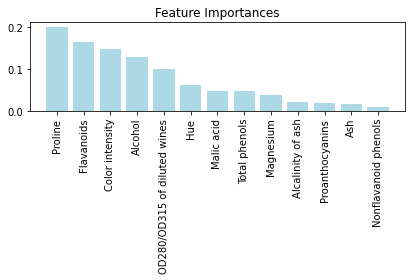

In [23]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = np.array(['Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])

#feat_labels = Columns[1:]

forest = RandomForestClassifier(n_estimators=100,
                                random_state=0,
                                n_jobs=-1)

forest.fit(x_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(x_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(x_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

# 評估方法 Evaluation

### accuracy_score
### https://www.knime.com/blog/from-modeling-to-scoring-confusion-matrix-and-class-statistics

- 準確率分數是指所有正確的百分比
- 比較容易理解
- 無法顯示分佈與分類器犯錯的類型

In [24]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3, 2, 1]
y_true = [0, 1, 2, 3, 1, 1]

In [25]:
accuracy_score(y_true, y_pred)

0.5

In [26]:
accuracy_score(y_true, y_pred, normalize=False)
#幾個數量是對的

3

##### 實戰: 乳癌資料集

In [27]:
# import datasets, numpy
from sklearn import datasets
import numpy as np

In [28]:
# 從datasets 載入 breast_cancer 資料集，分出X y
bc = datasets.load_breast_cancer() #載入sklearn的資料
x=bc.data
y=bc.target

In [29]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [30]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [31]:
# 切訓練測試集

from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=929)

In [32]:
# 標準化 StandardScaler

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc.fit(x_train)
X_train_std = stdsc.transform(x_train) #transform
X_test_std = stdsc.transform(x_test) #transform

In [33]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)


In [34]:
print(y_pred)
print(y_test)

[0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0
 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1
 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0]
[0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1
 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0
 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1
 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0]


In [35]:
## Reading a confusion matrix


- ACC = 1 - ERR = (TP+TN) /ALL
- PRE(precision) = TP/(TP+FP)
- REC(recall) = TP/(TP+FN)
- F1 = 2 PRE*REC / (PRE+REC)

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 60   6]
 [  2 103]]


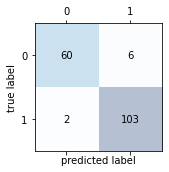

In [38]:
# 畫圖

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

### 算出 precision、recall、F1

In [55]:
import numpy as np
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

print('Accuracy_score %.3f' % accuracy_score(y_test,y_pred))
print('Precision: %.3f' % precision_score(y_test,y_pred))
print('Recall: %.3f' % recall_score(y_test,y_pred))
print('F1: %.3f' % f1_score(y_test,y_pred))

Accuracy_score 0.953
Precision: 0.945
Recall: 0.981
F1: 0.963


# 交叉驗證(Cross validation)

##### 為什麼需要交叉驗證

為了避免依賴某一特定的訓練和測試資料產生偏差。

##### 交叉驗證怎麼做？

In [56]:
Image(filename='./images/10-fold.png', width=500) 

FileNotFoundError: [Errno 2] No such file or directory: './images/10-fold.png'

- 將資料分成10等份，
- 其中第1等分用來當作驗證的測試資料，其餘9份拿來訓練
- 輪流，總共做10次。
- 藉著將10次的準確性(Accuracy)平均，而這個得到的平均值

In [41]:
# import
import numpy as np
from sklearn import datasets
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [58]:
# 讀 iris 資料集
iris =datasets.load_iris()
x=iris.data
y=iris.target

In [43]:
# knn
knn=KNeighborsClassifier()

In [60]:
# cross_val_score
scores = cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


In [45]:
# 改變n_neighbors
k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

TypeError: Singleton array array(3) cannot be considered a valid collection.

ValueError: x and y must have same first dimension, but have shapes (30,) and (0,)

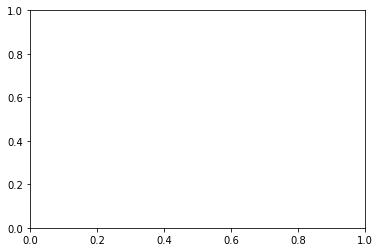

In [46]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

- 不同的n_neighbors會有不同的準確度
 - 中間取間的k數量是最好的
- 而到後面則有下降的趨勢==>Overfitting 過度擬合

...